## Importing important libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Importing datasets

In [2]:
data1 = pd.read_excel('EastWestAirlines.xlsx')

In [3]:
xls = pd.ExcelFile("EastWestAirlines.xlsx")
data1 = pd.read_excel(xls,'data')
data1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Data Understanding

In [4]:
data1.shape

(3999, 12)

In [5]:
data1.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
data1.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

## Data Preparation

In [7]:
X = data1.drop('ID#',axis= 1)
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
scaled_X.mean()

5.944207114499463e-17

In [10]:
scaled_X.std()

1.0

In [11]:
k_means_model1 = KMeans(n_clusters=3)
k_means_model1.fit(scaled_X)

KMeans(n_clusters=3)

In [12]:
y_pre1 = k_means_model1.predict(scaled_X)

In [13]:
y_pre1

array([1, 1, 1, ..., 0, 1, 1])

In [14]:
wss_n =[]
for i in range(1,11):
    k_model1 = KMeans(n_clusters=i)
    k_model1.fit(scaled_X)
    wss_n.append(k_model1.inertia_)

In [15]:
wss_n

[43989.00000000009,
 35409.51662986136,
 30899.216408790628,
 27161.398956033405,
 23706.97868549456,
 21470.622363800125,
 19165.863859642937,
 17316.683045718368,
 15959.95788113714,
 14726.983322766804]

Text(0, 0.5, 'Distance WCSS')

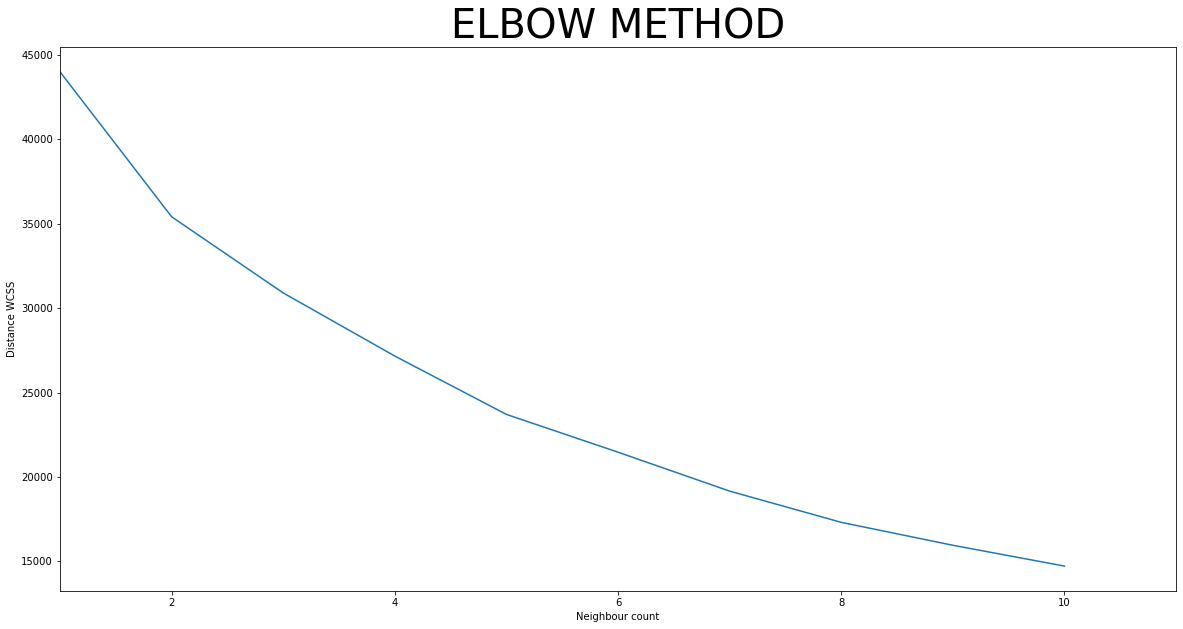

In [16]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11),wss_n)
plt.title('ELBOW METHOD',size=40)
plt.xlim(1,11)
plt.xlabel('Neighbour count')
plt.ylabel('Distance WCSS')

In [17]:
## We can see that after k=3,the rate of reduction of distance values is very less. Hence, the optimal value for k is 3

## Hierarical clustering

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

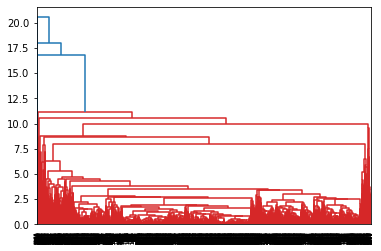

In [19]:
# creating dendogram
dendogram = sch.dendrogram(sch.linkage(scaled_X,method='average'))

In [20]:
# creating clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

In [21]:
y_hc = hc.fit_predict(scaled_X)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [23]:
data1['Clusters'] = Clusters

In [24]:
data1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [25]:
data1[data1['Clusters']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [26]:
data1[data1['Clusters']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,1
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,1
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,1


In [27]:
data1[data1['Clusters']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2


In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_score(scaled_X,y_hc)

0.7838667595062349

## DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
# DBSCAN clustering 
dbs = DBSCAN(eps=2,min_samples=5)

In [32]:
dbs.fit(scaled_X)

DBSCAN(eps=2)

In [33]:
# Noisy samples are given the labels -1
dbs.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
Cluster=pd.DataFrame(dbs.labels_,columns=['Clusters'])
Cluster

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [35]:
data1['Clusters'] = Cluster

In [36]:
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
